In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple Linear Regression

## 1. Import Data

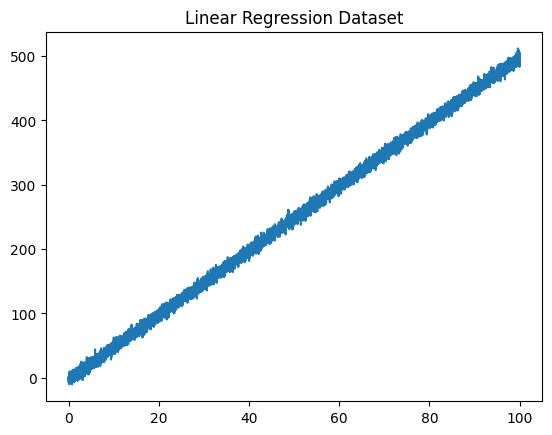

In [28]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x = np.linspace(0,100,n_points)
y = a*x+b

white_noise = np.random.randn(len(x))*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x':x})
target = pd.DataFrame(data={'y':y})
plt.plot(x,y)
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [5]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [6]:
# Train - Test Split
split_point = int(len(x) * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

train_x = train_x.to_numpy().T
test_x = test_x.to_numpy().T
train_y = train_y.to_numpy().T
test_y = test_y.to_numpy().T

# 3. Prediction

In [20]:
model = NeuralNetworkFromScratch(layers_dims=[1, 8, 4, 3, 2, 1], cost_function='RMSE', learning_rate=1e-4, num_iterations=8000, print_cost=True)

In [21]:
parameters, costs = model.fit(train_x, train_y)

Cost after iteration 0: 140.99272607846353
Cost after iteration 100: 50.50495452902703
Cost after iteration 200: 38.111237944311654
Cost after iteration 300: 34.9877474103015
Cost after iteration 400: 33.38167520368448
Cost after iteration 500: 32.30558521232299
Cost after iteration 600: 31.459373956327806
Cost after iteration 700: 30.746540210578775
Cost after iteration 800: 30.12438621027811
Cost after iteration 900: 29.55191571910183
Cost after iteration 1000: 29.02709909276626
Cost after iteration 1100: 28.53203952651611
Cost after iteration 1200: 28.053272763614324
Cost after iteration 1300: 27.59516477279243
Cost after iteration 1400: 27.15283741590508
Cost after iteration 1500: 26.70331171936655
Cost after iteration 1600: 25.92913899857219
Cost after iteration 1700: 25.297358715793525
Cost after iteration 1800: 24.822930641324607
Cost after iteration 1900: 24.489076303195773
Cost after iteration 2000: 24.234666738881806
Cost after iteration 2100: 24.019489465578133
Cost after it

Text(0, 0.5, 'Cost Function')

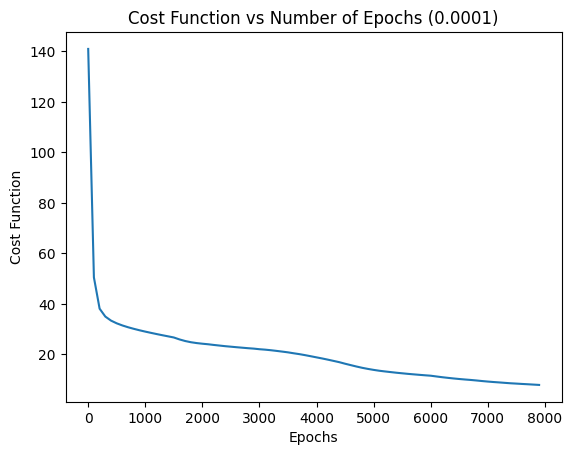

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, len(model.costs))*100, model.costs)
plt.title(f'Cost Function vs Number of Epochs ({model.learning_rate})')
plt.xlabel('Epochs')
plt.ylabel('Cost Function')

In [23]:
pred_train = model.predict(train_x, train_y)

RMSE: 7.80453544218116


In [24]:
pred = model.predict(test_x, test_y)

RMSE: 14.727590760367974


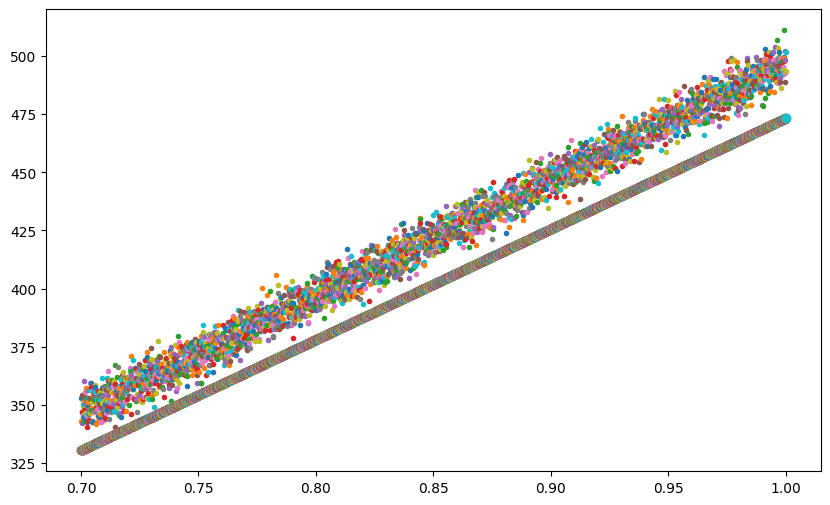

In [25]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.')
plt.plot(test_x, pred.reshape(1,-1), 'o');

# Example 2: Fetch California Housing Dataset

## 1. Import Data

In [ ]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

In [ ]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [ ]:
results = pd.DataFrame(data={'actual':test_y[0], 'pred':pred_test[0]})
results.plot(label=['actual', 'pred'])

mape = mean_absolute_percentage_error(test_y, pred_test)
mape